#0. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

#1. Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_folder = '/content/drive/My Drive/bladder_cancer_dataset'

In [4]:
import os
data_files = os.listdir(data_folder)

bcd = os.path.join(data_folder, 'bcd.csv')

In [5]:
df = pd.read_csv(bcd)
df

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Age at Which Sequencing was Reported (Years),Cancer Type,Cancer Type Detailed,Ethnicity Category,Fraction Genome Altered,Gene Panel,...,Sample coverage,Sample Type,Sex,Smoker,Somatic Status,Specimen Stage,Systemic Treatment,TMB (nonsynonymous),Tumor Purity,Treatment between Pri-Met sample collection
0,paired_bladder_2022,P-0000034,P-0000034-T01-IM3,75.0,78,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.1591,IMPACT341,...,461.0,Primary,Male,Former,Matched,4.0,1,13.309864,40,NaN
1,paired_bladder_2022,P-0000043,P-0000043-T02-IM3,50.0,58,Bladder Cancer,Bladder Urothelial Carcinoma,NaN,0.4515,IMPACT341,...,833.0,Metastasis,NaN,Active,Matched,4.0,1,29.947193,50,NaN
2,paired_bladder_2022,P-0000056,P-0000056-T01-IM3,57.0,60,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.0689,IMPACT341,...,1004.0,Primary,Male,Active,Matched,3.0,1,5.545777,60,NaN
3,paired_bladder_2022,P-0000063,P-0000063-T01-IM3,61.0,63,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.5047,IMPACT341,...,900.0,Primary,Male,Never,Matched,3.0,1,15.528174,70,NaN
4,paired_bladder_2022,P-0000068,P-0000068-T01-IM3,77.0,80,Bladder Cancer,Bladder Urothelial Carcinoma,Non-Spanish; Non-Hispanic,0.0052,IMPACT341,...,973.0,Metastasis,Male,Former,Matched,4.0,0,3.327466,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,paired_bladder_2022,P-0015660,s_C_E4UHYD_P001_d,NaN,NaN,Bladder/Urinary Tract Cancer,Bladder/Urinary Tract,Non-Spanish; Non-Hispanic,0.1831,IMPACT468,...,378.0,Primary,Male,Former,NaN,NaN,NaN,6.917585,NaN,Chemo
1655,paired_bladder_2022,P-0033364,s_C_F75LKW_M001_d,NaN,NaN,Bladder/Urinary Tract Cancer,Bladder/Urinary Tract,Non-Spanish; Non-Hispanic,0.4761,IMPACT468,...,933.0,Metastasis,Male,Former,NaN,NaN,NaN,9.511679,NaN,Naive
1656,paired_bladder_2022,P-0015663,s_C_F8A03J_M001_d,NaN,NaN,Bladder/Urinary Tract Cancer,Bladder/Urinary Tract,Non-Spanish; Non-Hispanic,0.2607,IMPACT468,...,867.0,Metastasis,Female,Active,NaN,NaN,NaN,6.052887,NaN,Naive
1657,paired_bladder_2022,P-0034906,s_C_N0LN75_P001_d,NaN,NaN,Bladder/Urinary Tract Cancer,Bladder/Urinary Tract,Non-Spanish; Non-Hispanic,0.8778,IMPACT468,...,562.0,Primary,Female,Former,NaN,NaN,NaN,6.917585,NaN,Chemo


#2. Preprocessing

##a. Removing Null Values and Dropping Columns

In [6]:
print(df.isnull().sum())

Study ID                                           0
Patient ID                                         0
Sample ID                                          0
Age at Diagnosis                                 387
Age at Which Sequencing was Reported (Years)     153
Cancer Type                                        0
Cancer Type Detailed                               0
Ethnicity Category                                12
Fraction Genome Altered                          133
Gene Panel                                         0
Intravesical Treatment                           346
Metastatic Site                                 1340
Met Location                                    1366
MSI Score                                         27
MSI Type                                         158
Mutation Count                                    38
Oncotree Code                                      0
Overall Survival (Months)                         77
Overall Survival Status                       

In [7]:
# Drop columns
drop = ['Study ID', 'Patient ID', 'Sample ID', 'Metastatic Site', 'Met Location', 'Treatment between Pri-Met sample collection']
df = df.drop(columns=drop)

In [8]:
df = df.dropna()
print(df.isnull().sum())

Age at Diagnosis                                0
Age at Which Sequencing was Reported (Years)    0
Cancer Type                                     0
Cancer Type Detailed                            0
Ethnicity Category                              0
Fraction Genome Altered                         0
Gene Panel                                      0
Intravesical Treatment                          0
MSI Score                                       0
MSI Type                                        0
Mutation Count                                  0
Oncotree Code                                   0
Overall Survival (Months)                       0
Overall Survival Status                         0
Pediatric Case Indicator                        0
Primary Tumor Site                              0
Race Category                                   0
Religion                                        0
Sample Class                                    0
Number of Samples Per Patient                   0


In [9]:
df.shape

(1175, 29)

In [10]:
df.dtypes

Age at Diagnosis                                float64
Age at Which Sequencing was Reported (Years)     object
Cancer Type                                      object
Cancer Type Detailed                             object
Ethnicity Category                               object
Fraction Genome Altered                         float64
Gene Panel                                       object
Intravesical Treatment                           object
MSI Score                                       float64
MSI Type                                         object
Mutation Count                                  float64
Oncotree Code                                    object
Overall Survival (Months)                       float64
Overall Survival Status                          object
Pediatric Case Indicator                         object
Primary Tumor Site                               object
Race Category                                    object
Religion                                        

##b. Removing 'Unknown' values and fixing data types

In [11]:
#Replacing >90 to 90
df['Age at Which Sequencing was Reported (Years)'] = df['Age at Which Sequencing was Reported (Years)'].replace('>90', 90)
df['Age at Which Sequencing was Reported (Years)'] = df['Age at Which Sequencing was Reported (Years)'].astype(int)

In [12]:
#Removing value 'Cancer of Unknown Primary' from 'Cancer Type' Column
df = df[df['Cancer Type'] != 'Cancer of Unknown Primary']

label_encoder_cancer_type = LabelEncoder()
df['Cancer Type'] = label_encoder_cancer_type.fit_transform(df['Cancer Type'])

<ipython-input-12-dc4a8aec46b2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cancer Type'] = label_encoder_cancer_type.fit_transform(df['Cancer Type'])


In [13]:
#Removing value 'Cancer of Unknown Primary' from 'Cancer Type' Column and encoding it to int
df = df[df['Cancer Type Detailed'] != 'Cancer of Unknown Primary']

label_encoder_cancer_type_detailed = LabelEncoder()
df['Cancer Type Detailed'] = label_encoder_cancer_type_detailed.fit_transform(df['Cancer Type Detailed'])

In [14]:
#Encoding 'Ethnicity Category' column to int
label_encoder_ethnicitiy = LabelEncoder()
df['Ethnicity Category'] = label_encoder_ethnicitiy.fit_transform(df['Ethnicity Category'])

In [15]:
#Encoding 'Gene Panel' column to int
label_encoder_gene = LabelEncoder()
df['Gene Panel'] = label_encoder_gene.fit_transform(df['Gene Panel'])

In [16]:
#Removing value '.' from 'Intravesical Treatment' Column
df = df[df['Intravesical Treatment'] != '.']

df['Intravesical Treatment'] = df['Intravesical Treatment'].astype(int)

In [17]:
#Encoding 'MSI Type' column to int
label_encoder_msi_type = LabelEncoder()
df['MSI Type'] = label_encoder_msi_type.fit_transform(df['MSI Type'])

In [18]:
#Encoding 'Oncotree Code' column to int
label_encoder_oncotree_code = LabelEncoder()
df['Oncotree Code'] = label_encoder_oncotree_code.fit_transform(df['Oncotree Code'])

In [19]:
#Encoding 'Overall Survival Status' column to int
label_encoder_overall_survival_status = LabelEncoder()
df['Overall Survival Status'] = label_encoder_overall_survival_status.fit_transform(df['Overall Survival Status'])

In [20]:
#Encoding 'Pediatric Case Indicator' column to int
label_encoder_pediatric = LabelEncoder()
df['Pediatric Case Indicator'] = label_encoder_pediatric.fit_transform(df['Pediatric Case Indicator'])

In [21]:
#Removing value 'Unknown' from 'Primary Tumour Site' Column and encoding it to int
df = df[df['Primary Tumor Site'] != 'Unknown']

label_encoder_primary_tumor_site = LabelEncoder()
df['Primary Tumor Site'] = label_encoder_primary_tumor_site.fit_transform(df['Primary Tumor Site'])

In [22]:
#Removing value 'PT REFUSED TO ANSWER', 'NO VALUE ENTERED' and 'UNKNOWN' from 'Race Category' Column and encoding it to int
df = df[df['Race Category'] != 'PT REFUSED TO ANSWER']
df = df[df['Race Category'] != 'NO VALUE ENTERED']
df = df[df['Race Category'] != 'UNKNOWN']

label_encoder_race_category = LabelEncoder()
df['Race Category'] = label_encoder_race_category.fit_transform(df['Race Category'])

In [23]:
#Removing value 'NO VALUE ENTERED' and 'UNKNOWN' from 'Religion' Column and encoding it to int
df = df[df['Religion'] != 'NO VALUE ENTERED']
df = df[df['Religion'] != 'UNKNOWN']

label_encoder_religion = LabelEncoder()
df['Religion'] = label_encoder_religion.fit_transform(df['Religion'])

In [24]:
#Encoding 'Sample Class' column to int
label_encoder_sample_class = LabelEncoder()
df['Sample Class'] = label_encoder_sample_class.fit_transform(df['Sample Class'])

In [25]:
#Removing value 'Unknown' and 'Unknown_Tumor' from 'Sample Type' Column and encoding it to int
df = df[df['Sample Type'] != 'Unknown']
df = df[df['Sample Type'] != 'Unknown_Tumor']

label_encoder_sample_type = LabelEncoder()
df['Sample Type'] = label_encoder_sample_type.fit_transform(df['Sample Type'])

In [26]:
#Encoding 'Sex' column to int
label_encoder_sex = LabelEncoder()
df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])

In [27]:
#Encoding 'Smoker' column to int
label_encoder_smoker = LabelEncoder()
df['Smoker'] = label_encoder_smoker.fit_transform(df['Smoker'])

In [28]:
#Encoding 'Somatic Status' column to int
label_encoder_somatic_status = LabelEncoder()
df['Somatic Status'] = label_encoder_somatic_status.fit_transform(df['Somatic Status'])

In [29]:
#Removing value '.' from 'Systemic Treatment' Column
df = df[df['Systemic Treatment'] != '.']

df['Systemic Treatment'] = df['Systemic Treatment'].astype(int)

In [30]:
#Removing value '<10' from 'Tumor Purity' Column
df = df[df['Tumor Purity'] != '<10']

df['Tumor Purity'] = df['Tumor Purity'].astype(int)

<ipython-input-30-cf5e2cc86ca0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tumor Purity'] = df['Tumor Purity'].astype(int)


##c. Reordering

In [31]:
columns = df.columns.tolist()
columns.remove('Overall Survival Status')
columns.append('Overall Survival Status')

#Reorder the columns
df = df[columns]

#Resetting index
df = df.reset_index(drop=True)

In [32]:
df

,Age at Diagnosis,Age at Which Sequencing was Reported (Years),Cancer Type,Cancer Type Detailed,Ethnicity Category,Fraction Genome Altered,Gene Panel,Intravesical Treatment,MSI Score,MSI Type,...,Sample coverage,Sample Type,Sex,Smoker,Somatic Status,Specimen Stage,Systemic Treatment,TMB (nonsynonymous),Tumor Purity,Overall Survival Status
0,75.0,78,0,1,2,0.1591,0,0,0.08,3,...,461.0,2,1,1,0,4.0,1,13.309864,40,1
1,57.0,60,0,1,2,0.0689,0,0,0.63,3,...,1004.0,2,1,0,0,3.0,1,5.545777,60,1
2,61.0,63,0,1,2,0.5047,0,0,1.86,3,...,900.0,2,1,2,0,3.0,1,15.528174,70,0
3,77.0,80,0,1,2,0.0052,0,0,0.00,3,...,973.0,1,1,1,0,4.0,0,3.327466,20,1
4,64.0,67,0,1,2,0.0500,0,0,0.00,3,...,795.0,2,1,0,0,3.0,1,9.982398,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,56.0,85,0,1,2,0.2786,2,1,0.11,3,...,798.0,2,1,1,0,3.0,0,2.594094,40,0
1106,70.0,72,0,1,2,0.0000,2,1,0.10,3,...,369.0,2,1,2,0,3.0,0,3.458792,20,0
1107,70.0,72,0,1,2,0.0272,2,1,0.83,3,...,713.0,2,1,2,0,3.0,0,2.594094,30,0
1108,76.0,77,0,1,2,0.0241,2,0,0.36,3,...,786.0,2,1,0,0,2.0,0,50.152490,70,0


#3. Class Imbalance Resolution

In [33]:
#Count of Overall Survival Status
fig_review = px.bar(df['Overall Survival Status'].value_counts().reset_index(),
                          x='index', y='Overall Survival Status',
                          labels={'index': 'Overall Survival Status', 'Overall Survival Status': 'Count'},
                          title='Bar Plot for Overall Survival Status')
fig_review.show()

In [34]:
#Undersampling Class 0
undersample_count = 396

X = df.drop(columns=['Overall Survival Status'])
y = df['Overall Survival Status']

# Apply random undersampling to class 0
undersampler = RandomUnderSampler(sampling_strategy={0: undersample_count})
X_resampled, y_resampled = undersampler.fit_resample(X, y)

dfun = pd.concat([X_resampled, y_resampled], axis=1)

In [35]:
#Count of Overall Survival Status
fig_review = px.bar(dfun['Overall Survival Status'].value_counts().reset_index(),
                          x='index', y='Overall Survival Status',
                          labels={'index': 'Overall Survival Status', 'Overall Survival Status': 'Count'},
                          title='Bar Plot for Overall Survival Status')
fig_review.show()

#4. Model Training and Evaluation (df)

## Test Train Split

In [36]:
X = df.drop(['Overall Survival Status'], axis = 1)
y = df['Overall Survival Status']

In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##a. Random Forest

In [39]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       144
           1       0.85      0.73      0.79        78

    accuracy                           0.86       222
   macro avg       0.86      0.83      0.84       222
weighted avg       0.86      0.86      0.86       222



##b. Support Vector Machine

In [40]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_svm.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       144
           1       0.83      0.77      0.80        78

    accuracy                           0.86       222
   macro avg       0.86      0.84      0.85       222
weighted avg       0.86      0.86      0.86       222



##c. AdaBoost

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

adaboost_model = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_ada = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_ada.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       144
           1       0.86      0.76      0.80        78

    accuracy                           0.87       222
   macro avg       0.87      0.84      0.85       222
weighted avg       0.87      0.87      0.87       222



##d. K-nearest Neighbor

In [42]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}


knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_knn.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       144
           1       0.82      0.46      0.59        78

    accuracy                           0.77       222
   macro avg       0.79      0.70      0.72       222
weighted avg       0.78      0.77      0.76       222



##e. XGBoost

In [43]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [None, 3, 5, 7],
    'n_estimators': [10, 100, 200, 300]
}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_xgb.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       144
           1       0.81      0.78      0.80        78

    accuracy                           0.86       222
   macro avg       0.85      0.84      0.85       222
weighted avg       0.86      0.86      0.86       222



##f. Artificial Neural Network

In [44]:
def ANN(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=28))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
ann_model = ANN()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = ann_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)


# Make predictions on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

Epoch 1/100
23/23 [==============================] - 2s 14ms/step - loss: 0.6244 - accuracy: 0.6408 - val_loss: 0.5351 - val_accuracy: 0.7360
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.7296 - val_loss: 0.4726 - val_accuracy: 0.8258
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4867 - accuracy: 0.7803 - val_loss: 0.4290 - val_accuracy: 0.8427
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4408 - accuracy: 0.8183 - val_loss: 0.3973 - val_accuracy: 0.8427
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4329 - accuracy: 0.8085 - val_loss: 0.3798 - val_accuracy: 0.8427
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3950 - accuracy: 0.8338 - val_loss: 0.3696 - val_accuracy: 0.8315
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3893 - accuracy: 0.8394 - val_loss: 0.3547 - val_accuracy: 0.8315
Epoch 8/100


##g. Voting Classifier

###Hard Voting

In [45]:
vc_hard = VotingClassifier([
    ('svm', SVC(C=1, gamma=0.1, kernel='linear',probability=True)),
    ('xgboost', xgb.XGBClassifier(learning_rate=0.1, max_depth=None, n_estimators=100)),
    ('adaboost', AdaBoostClassifier(learning_rate=0.1, n_estimators=100)),
    ('randomforest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300))
], voting='hard')

vc_hard.fit(X_train, y_train)
y_pred = vc_hard.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       144
           1       0.86      0.77      0.81        78

    accuracy                           0.87       222
   macro avg       0.87      0.85      0.86       222
weighted avg       0.87      0.87      0.87       222



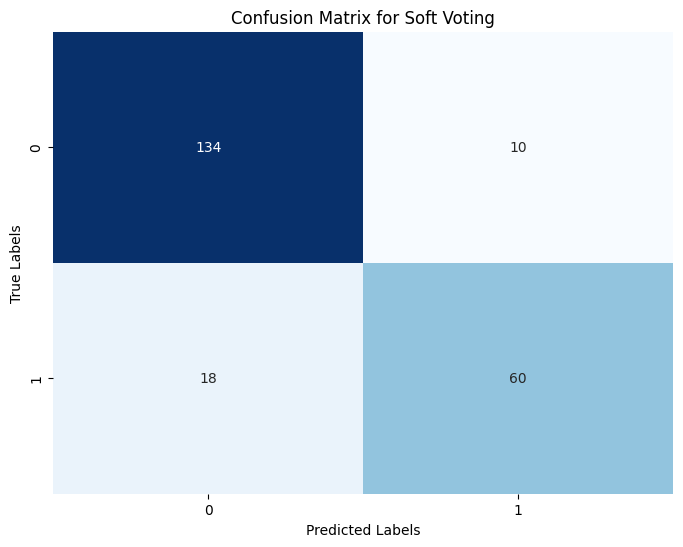

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Soft Voting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###Soft Voting

In [47]:
vc_soft = VotingClassifier([
    ('svm', SVC(C=1, gamma=0.1, kernel='linear',probability=True)),
    ('adaboost', AdaBoostClassifier(learning_rate=0.1, n_estimators=100)),
    ('xgboost', xgb.XGBClassifier(learning_rate=0.1, max_depth=None, n_estimators=100)),
    ('randomforest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300))
], voting='soft')

vc_soft.fit(X_train, y_train)
y_pred = vc_soft.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       144
           1       0.85      0.78      0.81        78

    accuracy                           0.87       222
   macro avg       0.87      0.85      0.86       222
weighted avg       0.87      0.87      0.87       222



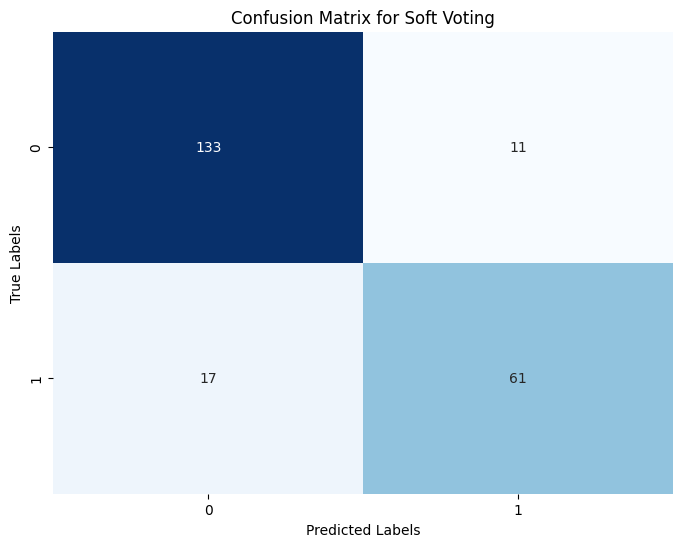

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Soft Voting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#5. Model Training and Evaluation (downsampled df)

In [ ]:
X = dfun.drop(['Overall Survival Status'], axis = 1)
y = dfun['Overall Survival Status']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##a. Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_rf.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        75
           1       0.89      0.85      0.87        84

    accuracy                           0.86       159
   macro avg       0.86      0.86      0.86       159
weighted avg       0.86      0.86      0.86       159



##b. Support Vector Machine

In [ ]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_svm.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        75
           1       0.89      0.87      0.88        84

    accuracy                           0.87       159
   macro avg       0.87      0.87      0.87       159
weighted avg       0.87      0.87      0.87       159



##c. AdaBoost

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

adaboost_model = AdaBoostClassifier()
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_ada = grid_search.best_estimator_
best_params = grid_search.best_params_

y_pred = best_ada.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        75
           1       0.91      0.87      0.89        84

    accuracy                           0.89       159
   macro avg       0.89      0.89      0.89       159
weighted avg       0.89      0.89      0.89       159



##d. K-nearest Neighbor

In [ ]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}


knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_knn.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        75
           1       0.79      0.76      0.78        84

    accuracy                           0.77       159
   macro avg       0.77      0.77      0.77       159
weighted avg       0.77      0.77      0.77       159



##e. XGBoost

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [None, 3, 5, 7],
    'n_estimators': [10, 100, 200, 300]
}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_


y_pred = best_xgb.predict(X_test)

print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        75
           1       0.90      0.85      0.87        84

    accuracy                           0.87       159
   macro avg       0.87      0.87      0.87       159
weighted avg       0.87      0.87      0.87       159



##f. Convolutional Neural Network

In [ ]:
def ANN(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=28))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
ann_model = ANN()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = ann_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)


# Make predictions on the test set
y_pred_prob = ann_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 0.7151 - accuracy: 0.4980 - val_loss: 0.6554 - val_accuracy: 0.6457
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.6660 - val_loss: 0.5907 - val_accuracy: 0.7323
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.7372 - val_loss: 0.5368 - val_accuracy: 0.7559
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5076 - accuracy: 0.7747 - val_loss: 0.4936 - val_accuracy: 0.7717
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4856 - accuracy: 0.7885 - val_loss: 0.4653 - val_accuracy: 0.7874
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7905 - val_loss: 0.4468 - val_accuracy: 0.7874
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.4285 - accuracy: 0.7846 - val_loss: 0.4274 - val_accuracy: 0.8031
Epoch 8/100


##g. Voting Classifier

###Hard Voting

In [ ]:
vc_hard = VotingClassifier([
    ('svm', SVC(C=1, gamma=0.1, kernel='linear',probability=True)),
    ('xgboost', xgb.XGBClassifier(learning_rate=0.1, max_depth=None, n_estimators=100)),
    ('adaboost', AdaBoostClassifier(learning_rate=0.1, n_estimators=100)),
    ('randomforest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300))
], voting='hard')

vc_hard.fit(X_train, y_train)
y_pred = vc_hard.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89        75
           1       0.91      0.89      0.90        84

    accuracy                           0.90       159
   macro avg       0.90      0.90      0.90       159
weighted avg       0.90      0.90      0.90       159



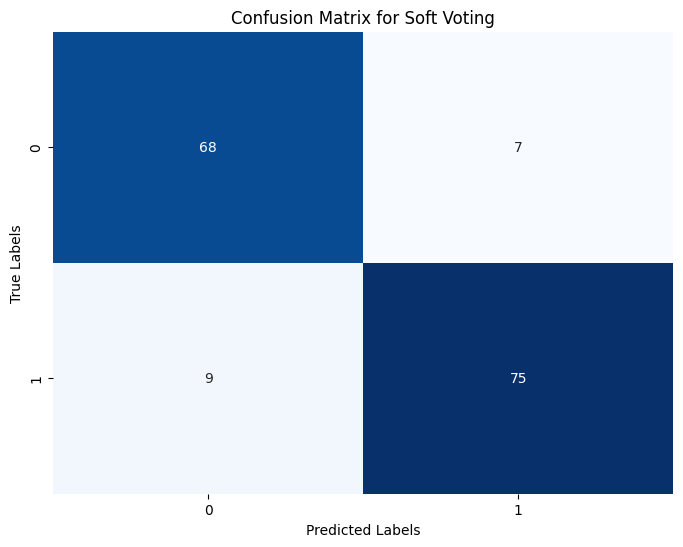

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Soft Voting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

###Soft Voting

In [ ]:
vc_soft = VotingClassifier([
    ('svm', SVC(C=1, gamma=0.1, kernel='linear',probability=True)),
    ('adaboost', AdaBoostClassifier(learning_rate=0.1, n_estimators=100)),
    ('xgboost', xgb.XGBClassifier(learning_rate=0.1, max_depth=None, n_estimators=100)),
    ('randomforest', RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300))
], voting='soft')

vc_soft.fit(X_train, y_train)
y_pred = vc_soft.predict(X_test)

classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nClassification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        75
           1       0.91      0.88      0.90        84

    accuracy                           0.89       159
   macro avg       0.89      0.89      0.89       159
weighted avg       0.89      0.89      0.89       159



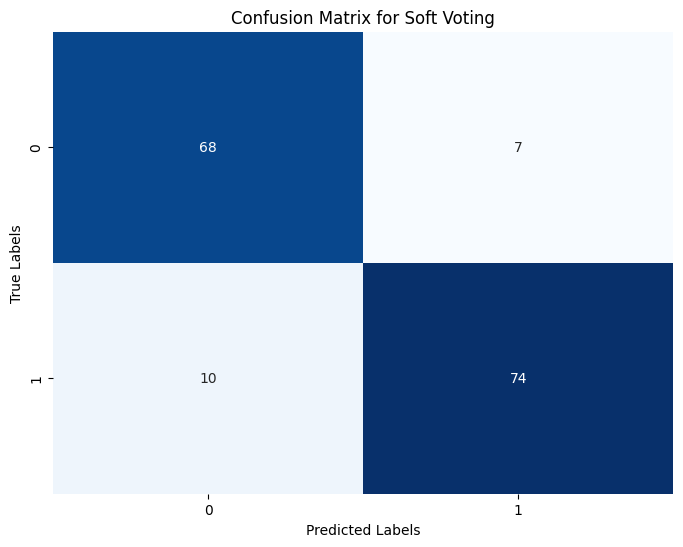

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Soft Voting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()